# Depositar statistic

In [2]:

!curl -L -o TaipeiSansTCBeta-Regular.ttf "https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download"
!apt-get install gzip
import matplotlib as mpl
import matplotlib.pyplot as plt
import subprocess
import gzip
import json
import requests
import numpy as np
from matplotlib.font_manager import fontManager
from collections import Counter

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.7M  100 19.7M    0     0  5072k      0  0:00:03  0:00:03 --:--:-- 6918k
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [33]:
# Set the command
cmd = [  # for package
    'ckanapi',
    'search',
    'datasets',
    '-O',
    'datasets.jsonl.gz',
    '-z',
    '-r',
    'https://data.depositar.io'
]

# Execute the command
subprocess.run(cmd, check=True)

o_dataset = []
dataset_path = "./datasets.jsonl.gz"
dataset_ad ="./datasets.jsonl"


with gzip.open(dataset_path, "rb") as f_in:
    with open(dataset_ad, "wb") as f_out:
        f_out.write(f_in.read())
with open("datasets.jsonl", "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)

/home/weipo/.local/lib/python3.10/site-packages/ckanapi/cli/search.py:63: FutureWarning: GzipFile was opened for writing, but this will change in future Python releases.  Specify the mode argument for opening it for writing.
  jsonl_output = gzip.GzipFile(fileobj=jsonl_output)


[{'author': '蔡韋漢', 'author_email': None, 'contact_email': 'hank89520@gmail.com', 'contact_person': '蔡韋漢', 'created_time': '2023-08-08', 'creator_user_id': 'b463adf3-d71e-4c46-abe0-016a72eac751', 'data_type': ['archive'], 'end_time': '2023-08-08', 'groups': [], 'id': 'f7cc490c-df6d-4c74-85e6-da3af9f7dc38', 'isopen': True, 'keywords': ['Q64481569'], 'language': ['zho'], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-08-08T07:00:16.070724', 'metadata_modified': '2023-08-14T03:44:45.682193', 'name': '50fa6', 'notes': '', 'num_resources': 2, 'num_tags': 1, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-08-08T07:01:54.950611', 'datastore_active': False, 'datastore_contains_all_re

In [34]:
cmd = [  # for package
    'ckanapi',
    'dump',
    'organizations',
    '--all',
    '-O',
    'projects.jsonl.gz',
    '-z',
    '-r',
    'https://data.depositar.io'
]

subprocess.run(cmd, check=True)

o_project = []

with gzip.open("projects.jsonl.gz", "rb") as f_in:
    with open("projects.jsonl", "wb") as f_out:
        f_out.write(f_in.read())
with open("projects.jsonl", "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_project.append(data)

/home/weipo/.local/lib/python3.10/site-packages/ckanapi/cli/dump.py:49: FutureWarning: GzipFile was opened for writing, but this will change in future Python releases.  Specify the mode argument for opening it for writing.
  jsonl_output = gzip.GzipFile(fileobj=jsonl_output)
0 [1] --- None 107ecological_check_project_of_keelung_city_2018
1 [2] 0.07s None ecocheck_taichung_2018
2 [3] 0.06s None ecological-considerations-107yilan
3 [4] 0.07s None chiahung
4 [5] 0.07s None ecological-considerations-107hsinchu
5 [6] 0.07s None 107-taoyuan
6 [7] 0.07s None 107
7 [8] 0.07s None ecological-considerations-107miaoli
8 [9] 0.06s None 2018
9 [10] 0.05s None 107yl
10 [11] 0.06s None ecological-considerations-107kaohsiung
11 [12] 0.06s None bn-right3
12 [13] 0.05s None ecocheck_taichung_2019-2020
13 [14] 0.06s None cycwater108109
14 [15] 0.06s None 108109changhuacology
15 [16] 0.06s None 109ch
16 [17] 0.07s None ch108-109
17 [18] 0.06s None 108-109_hsinchu
18 [19] 0.04s None ecocheck_miaoli_2019-20

{'approval_status': 'approved', 'created': '2019-12-10T10:59:34.280389', 'description': '此專案是由基隆市政府委託觀察家生態顧問有限公司執行，針對大武崙溪範圍內3件工程：「大武崙溪排水瓶頸改善工程」、「大武崙溪堤後排水暨瓶頸改善工程(堤後排水及護岸加高)」、「大武崙工業區小型抽排及調整池工程」，秉持生態保育之原則執行工程生態檢核作業。', 'display_name': '107基隆市生態檢核工作計畫', 'extras': [], 'groups': [], 'id': 'e95ce98f-705c-417b-821f-9dca68c8d634', 'image_display_url': 'https://data.depositar.io/uploads/group/2020-08-13-124731.523792IMG9499.JPG', 'image_url': '2020-08-13-124731.523792IMG9499.JPG', 'is_organization': True, 'name': '107ecological_check_project_of_keelung_city_2018', 'num_followers': 0, 'package_count': 1, 'state': 'active', 'tags': [], 'title': '107基隆市生態檢核工作計畫', 'type': 'organization'}


264 [None] 0.06s None tioceansounscape


In [3]:
# Set the command
cmd = [  # for package
    'ckanapi',
    'dump',
    'groups',
    '--all',
    '-O',
    'topics.jsonl.gz',
    '-z',
    '-r',
    'https://data.depositar.io'
]
# Execute the command
completed_process = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

o_topic = []


with gzip.open("topics.jsonl.gz", "rb") as f_in:
    with open("topics.jsonl", "wb") as f_out:
        f_out.write(f_in.read())
with open("topics.jsonl", "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)


<h2> Data format </h2>

In [ ]:
print("dataset",o_dataset[:2])
print("project",o_project[0])
print("topic",o_topic[0])

<h2> update among a week (package) </h2>


[{'time': '2023-08-15T01:52:29.154858', 'title': '2023 GIS中心：南山公墓相關資料'}, {'time': '2023-08-15T00:08:55.604774', 'title': '石門水庫阿姆坪防淤隧道工程計畫-大嵙崁清淤輸送系統委託規畫設計監造生態檢核-[施工階段]'}, {'time': '2023-08-14T09:03:53.715886', 'title': '2023 GIS中心：南山公墓相關資料'}, {'time': '2023-08-14T08:47:30.961480', 'title': '2023 GIS中心：南山公墓相關資料'}, {'time': '2023-08-14T08:45:54.612597', 'title': '2023 GIS中心：南山公墓相關資料'}, {'time': '2023-08-14T03:44:47.093220', 'title': '南山公墓專題素材'}, {'time': '2023-08-14T03:44:03.480147', 'title': '南山公墓專題素材'}, {'time': '2023-08-12T07:03:40.247649', 'title': "MarkZ's"}, {'time': '2023-08-12T07:03:29.008776', 'title': "MarkZ's"}, {'time': '2023-08-12T06:54:38.583751', 'title': "MarkZ's"}, {'time': '2023-08-11T02:52:23.697090', 'title': '南山公墓專題素材'}, {'time': '2023-08-11T02:51:33.744308', 'title': '南山公墓專題素材'}, {'time': '2023-08-11T02:41:49.458869', 'title': '南山公墓專題素材'}, {'time': '2023-08-11T02:40:50.290309', 'title': '南山公墓專題素材'}, {'time': '2023-08-10T01:09:50.499206', 'title': '三姓溪排水(河心累距0K+760~0K

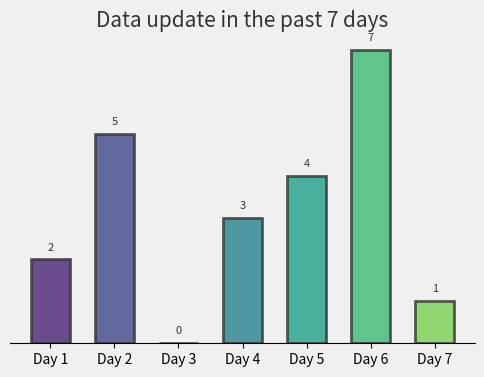

In [27]:
from datetime import datetime, timedelta
import pytz

url = "http://data.depositar.io/api/3/action/recently_changed_packages_activity_list?limit=100"
package_list = requests.get(url).json()
up_time = package_list['result']
day = 7
time_list = []
each_d_up = [0]*day

for i in up_time:
  time_list.append({'time':i['timestamp'],'title':i['data']['package']['title']})

def time_in_7d(time_list,each_d_up):
    tz = pytz.timezone("Asia/Taipei")
    current_tz = datetime.now(tz)
    current_time = str(current_tz.replace(tzinfo=None))
    current_date = datetime.fromisoformat(current_time)

    filter_time = []

    for i in time_list:
      time = datetime.fromisoformat(i['time'])
      if current_date - time <= timedelta(days=day):
        filter_time.append(i)
        for j in range(day):
          if  (current_date - time >= timedelta(days=j)) and (current_date - time <= timedelta(days=j+1)):
            each_d_up[j] = each_d_up[j] + 1
    return filter_time


days_7 = time_in_7d(time_list,each_d_up)
print(days_7)

def create_dynamic_list(day):
    return [f'Day {i}' for i in range(1, day + 1)]
days = create_dynamic_list(day)


each_d_value = []
for i, value in enumerate(each_d_up):
    each_d_value.append(value)
   

fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('#f0f0f0') # Set background color
ax.set_facecolor('#f0f0f0')
colors = plt.cm.viridis(np.linspace(0.1, 0.8, len(days)))
bars = ax.bar(days, each_d_value, color=colors, align='center', width=0.6, edgecolor='#333333', linewidth=2, alpha=0.8, label='Data Values', zorder=2)
# Customize the plot
ax.set_title(f'Data update in the past {day} days', fontsize=15, color='#333333')
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8, color='#333333')

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.yticks([])
plt.show()


<!-- <h1> average number of form fields which have data</h1>

**基本資訊:**
標題 網址 摘要 資料類型 Wikidata 關鍵字 標籤 語言 備註(都有)

**時空資訊:**
時間解析度 起始時間 結束時間 空間範圍 空間範圍.X.min 空間範圍.X.max 空間範圍.Y.min 空間範圍.Y.max 空間解析度

**管理資訊:** 授權 產製者 資料產製時間 資料處理歷程 專案 聯絡人 聯絡人的電子郵件(都有)

**資源層級:**
網址 名稱 摘要 字元編碼 座標參考系統 格式 (沒看到字元編碼和座標參考系統) -->

```{warning}
    It's impossible to know the update of the projects & topics. We can only fetch specific dataset from projects & topics by adding id on api. Without sending api one by one, we can't count projects & topics that are updated recently.
```

<!-- <h1>largest project</h1>
<p></p> -->

<!-- <h1>Spatial coverage</h1> -->

<!-- <h3> show出這些資料的位置 (有download file的code)</h3> -->

<!-- <h1> wikidata 關鍵字 </h1> -->